In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from plotly.offline import init_notebook_mode, iplot
import numpy as np
from PIL import Image
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score


In [2]:
def KNNAlg(X_train, X_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=3)
    knn = knn.fit(X_train, y_train)
    pred_test = knn.predict(X_test)
    return pred_test 
def Distance(x_actual, y_actual, x_predicted, y_predicted):#Euclidean Distance
    d_x = x_actual - x_predicted
    d_y = y_actual - y_predicted
    dist = d_x**2 + d_y**2
    dist = np.sqrt(dist)
    #dist = np.sort(dist)
    return dist
def CDF_pic(distances,method):
    sorted_dist = np.sort(distances)
    mean_dist = np.mean(distances)
    probabilites = 1. * np.arange(len(sorted_dist))/(len(sorted_dist) - 1)
    fig, ax = plt.subplots()
    ax.plot(sorted_dist, probabilites, color='black')
    plt.title('CDF of Euclidean distance error by: '+ method)
    plt.xlabel('Distance (m)')
    plt.ylabel('Probability')
    plt.text(0,0,f"Mean Error.: {mean_dist}")
    plt.grid(True)
    plt.show()
    plt.close()
def iplot_pic(y_test,pred_test):
    image = Image.open("iBeacon_Layout.jpg")
    init_notebook_mode(connected=True)

    xm=np.min(y_test ["x"])-1.5
    xM=np.max(y_test ["x"])+1.5
    ym=np.min(y_test ["y"])-1.5
    yM=np.max(y_test ["y"])+1.5

    data=[dict(x=[0], y=[0], 
               mode="markers", name = "Predictions",
               line=dict(width=2, color='green')
              ),
          dict(x=[0], y=[0], 
               mode="markers", name = "Actual",
               line=dict(width=2, color='blue')
              )

        ]

    layout=dict(xaxis=dict(range=[xm, 24], autorange=False, zeroline=False),
                yaxis=dict(range=[ym, 21], autorange=False, zeroline=False),
                title='Moving Dots', hovermode='closest',
                images= [dict(
                      source= image,
                      xref= "x",
                      yref= "y",
                      x= -3.5,
                      y= 22,
                      sizex= 36,
                      sizey=25,
                      sizing= "stretch",
                      opacity= 0.5,
                      layer= "below")]
                )

    frames=[dict(data=[dict(x=[pred_test[k, 0]], 
                            y=[pred_test[k, 1]], 
                            mode='markers',

                            marker=dict(color='red', size=10)
                            ),
                       dict(x=[y_test["x"].iloc[k]], 
                            y=[y_test["y"].iloc[k]], 
                            mode='markers',

                            marker=dict(color='blue', size=10)
                            )
                      ]) for k in range(int(len(pred_test))) 
           ]    

    figure1=dict(data=data, layout=layout, frames=frames)          
    iplot(figure1)
def scores(y_test_k,pred_test_k):
    distances_true =Distance(0, 0,y_test_k["x"], y_test_k["y"])
    distances_pred =Distance(pred_test_k[:, 0], pred_test_k[:, 1],0, 0)
    dis_true = np.array(distances_true)
    r2score = r2_score(dis_true, distances_pred)
    score = explained_variance_score(dis_true, distances_pred)
    print("Explained variance score is: ", score.round(4))
    print("R^2 score is: ",r2score.round(4))

In [3]:
data = pd.read_csv(r"iBeaconData.csv")
beaconData = data
ibeaconMarks = beaconData.iloc[:,-2:]#y
ibeaconRSSI= beaconData.iloc[:,1:-2]#x

In [4]:
data

,Unnamed: 0,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013,distance,angle,x,y
0,0,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200,8.246211,14.036243,8,2
1,1,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200,7.071068,8.130102,7,1
2,2,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200,7.071068,8.130102,7,1
3,3,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200,7.071068,8.130102,7,1
4,4,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200,7.071068,8.130102,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1415,-200,-76,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,14.035669,4.085617,14,1
1416,1416,-200,-72,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,14.035669,4.085617,14,1
1417,1417,-200,-67,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,14.035669,4.085617,14,1
1418,1418,-200,-79,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200,14.035669,4.085617,14,1


Explained variance score is:  0.9683
R^2 score is:  0.9683


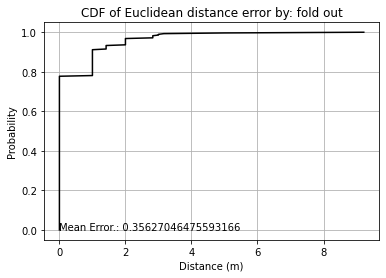

In [5]:
# split data by foldout
X_train, X_test, y_train, y_test = train_test_split(ibeaconRSSI,ibeaconMarks, test_size=0.2, random_state=2018, shuffle=True)
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)
pred_test = KNNAlg(X_train, X_test, y_train, y_test )
distances =Distance(pred_test[:, 0], pred_test[:, 1],y_test["x"], y_test["y"])
method = "fold out"
scores(y_test,pred_test)
CDF_pic(distances,method)


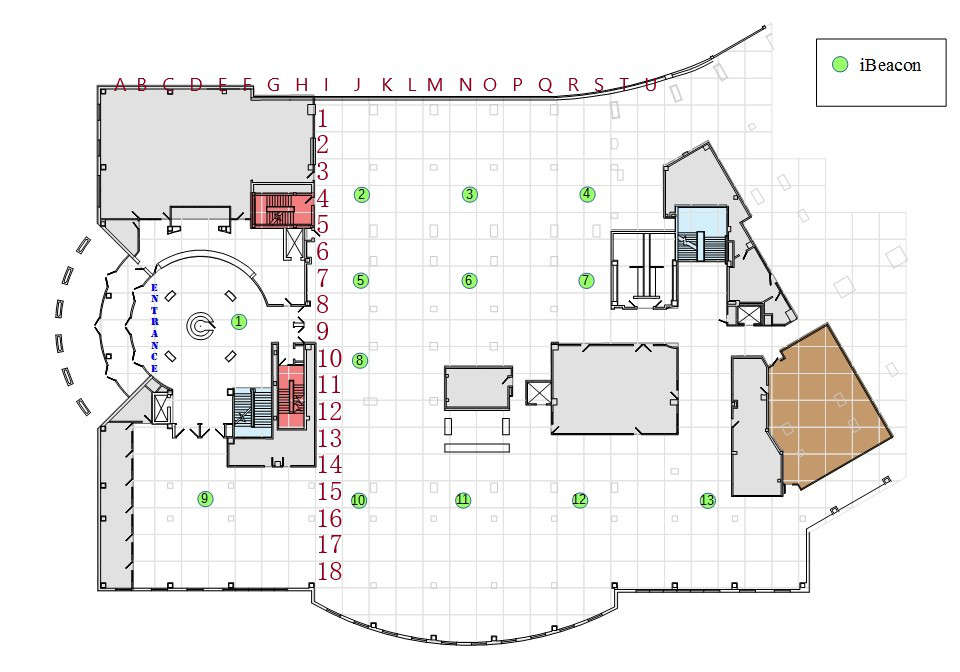

In [6]:
iplot_pic(y_test,pred_test)

In [7]:
#split data by K-Fold
from sklearn.model_selection import KFold

Explained variance score is:  0.9888
R^2 score is:  0.9888


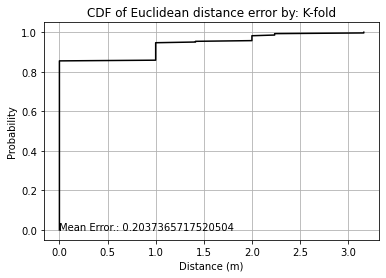

Explained variance score is:  0.971
R^2 score is:  0.971


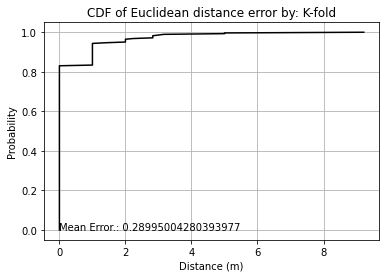

Explained variance score is:  0.9742
R^2 score is:  0.9741


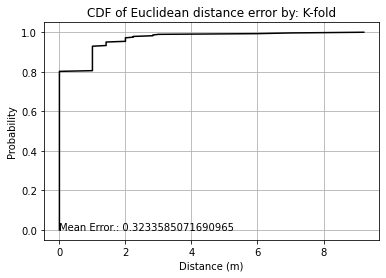

Explained variance score is:  0.9833
R^2 score is:  0.9832


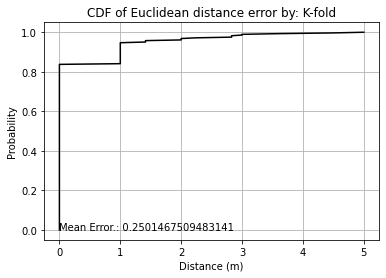

Explained variance score is:  0.9671
R^2 score is:  0.9669


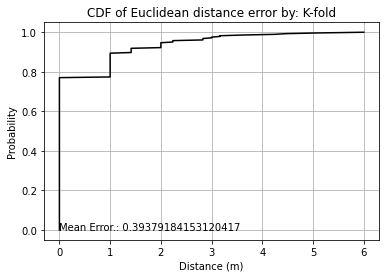

In [8]:
kf = KFold(n_splits=5, shuffle= True, random_state=35)
for train_index, test_index in kf.split(ibeaconRSSI,ibeaconMarks):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_k, X_test_k, y_train_k, y_test_k = ibeaconRSSI.iloc[train_index], ibeaconRSSI.iloc[test_index], ibeaconMarks.iloc[train_index], ibeaconMarks.iloc[test_index]
    scaler = StandardScaler()  
    scaler.fit(X_train_k)
    X_train_k = scaler.transform(X_train_k)  
    X_test_k = scaler.transform(X_test_k)  
    pred_test_k = KNNAlg(X_train_k, X_test_k, y_train_k, y_test_k )
    distances_k =Distance(pred_test_k[:, 0], pred_test_k[:, 1],y_test_k["x"], y_test_k["y"])
    method = "K-fold"
    scores(y_test_k,pred_test_k)
    CDF_pic(distances_k,method)


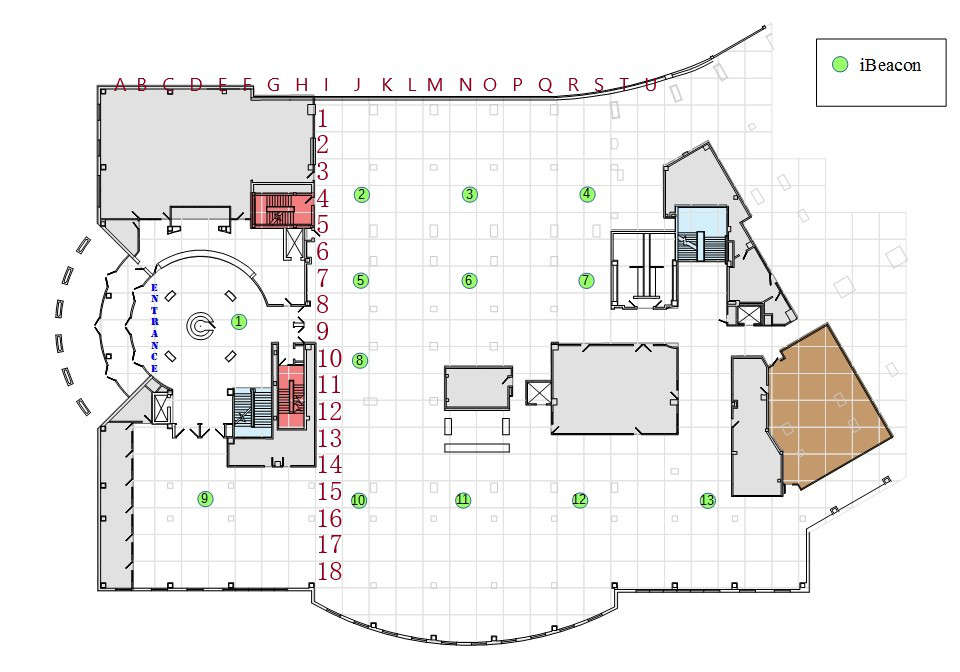

In [9]:
iplot_pic(y_test_k,pred_test_k)